# variants of Hypothesis testing

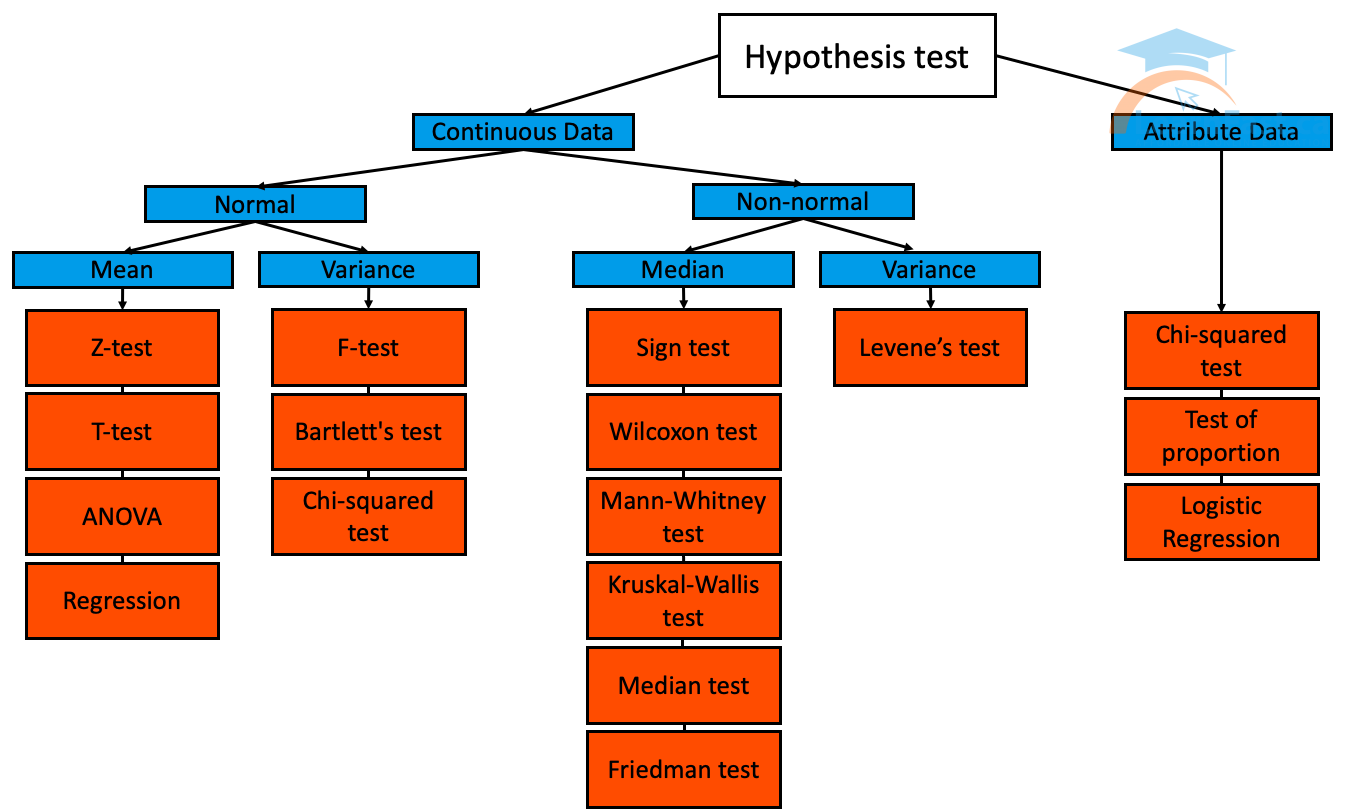

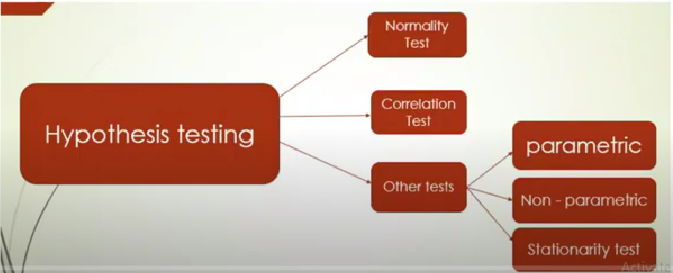

# 1. Normality test using Shapiro-wilk Test: tests if the ata is normally distributed

Assumption: Observation are identically distributed

In [1]:
import pandas as pd

winedata = pd.read_csv('winequality-red.csv')

In [2]:
winedata.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
winedata.dtypes == 'object'

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

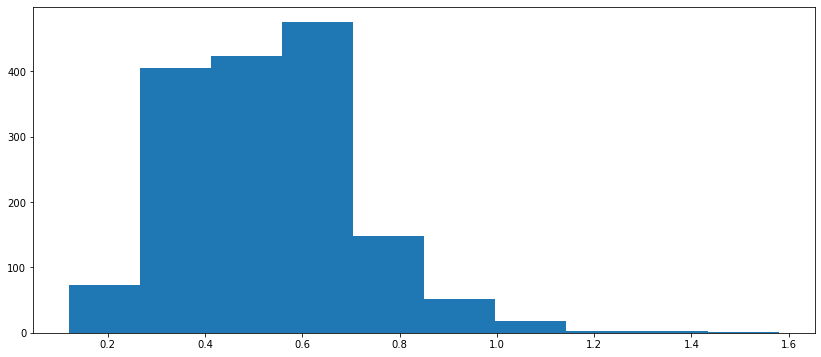

In [11]:
# checking histogram

import matplotlib
from matplotlib import pyplot
%matplotlib inline

pyplot.figure(figsize=(14,6))
pyplot.hist(winedata['volatile acidity'])
pyplot.show()

In [12]:
from scipy.stats import shapiro

datatotest = winedata['volatile acidity']
stat, p = shapiro(datatotest)

print('stat = %.2f, p = %.30f' % (stat,p))

if p > 0.05:
    print('Normally distributed')
else:
    print('Not narmally distributed')

stat = 0.97, p = 0.000000000000000268680677283857
Not narmally distributed


In [13]:
shapiro(datatotest)

ShapiroResult(statistic=0.9743340611457825, pvalue=2.686806772838566e-16)

In [14]:
from numpy.random import randn
datatotest = randn(100)

In [18]:
stat, p = shapiro(datatotest)

print('stat = %.2f, p = %.30f' % (stat,p))

if p > 0.05:
    print('Normally distributed')
else:
    print('Not narmally distributed')

stat = 0.99, p = 0.682513713836669921875000000000
Normally distributed


(array([ 3.,  0.,  9., 17., 16., 24., 14.,  7.,  5.,  5.]),
 array([-2.61287022, -2.09536774, -1.57786527, -1.06036279, -0.54286032,
        -0.02535784,  0.49214463,  1.00964711,  1.52714958,  2.04465206,
         2.56215453]),
 <BarContainer object of 10 artists>)

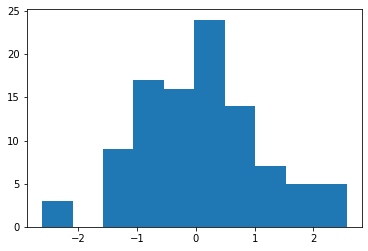

In [19]:
pyplot.hist(datatotest)

# Normality test using K^2 Normality Test Test: tests if the data is normally distributed

Asumption: Observation are identically distributed


In [23]:
# example of the D'agostino's K^2 normality test

from scipy.stats import normaltest

datatotest = winedata['volatile acidity']
stat, p = normaltest(datatotest)

print('stat = %.10f, p = %.40f' % (stat,p))

if p > 0.05:
    print('Normally distributed')
else:
    print('Not narmally distributed')


stat = 143.4193435598, p = 0.0000000000000000000000000000000719258904
Not narmally distributed


(array([ 73., 405., 423., 475., 148.,  51.,  18.,   3.,   2.,   1.]),
 array([0.12 , 0.266, 0.412, 0.558, 0.704, 0.85 , 0.996, 1.142, 1.288,
        1.434, 1.58 ]),
 <BarContainer object of 10 artists>)

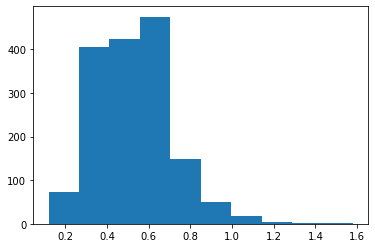

In [24]:
pyplot.hist(datatotest)

# correlation Test- Pearson and Spearman's Rank correlation(two continuous features)

Assumption- Identical and Normal Distribution

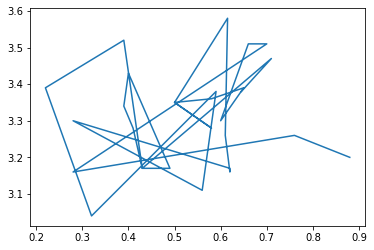

In [25]:
firstsample = winedata['volatile acidity'][1:30]
secondsample  = winedata['pH'][1:30]

pyplot.plot(firstsample,secondsample)
pyplot.show()

In [26]:
# spearman rank correlation

from scipy.stats import spearmanr

stat, p = spearmanr(firstsample,secondsample)

print('stat = %.3f, p = %.5f' % (stat,p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent Samples')

stat = 0.199, p = 0.30136
Independent samples


In [27]:
# pearson correlation

from scipy.stats import pearsonr

stat, p = pearsonr(firstsample,secondsample)

print('stat = %.3f, p = %.5f' % (stat,p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent Samples')

stat = 0.176, p = 0.36047
Independent samples


In [31]:
winedata.corr(method = 'pearson')

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

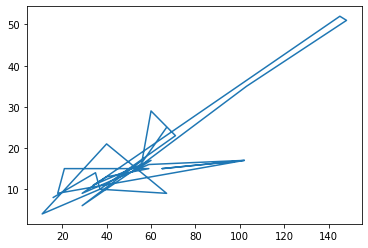

In [32]:
firstsample = winedata['total sulfur dioxide'][1:30]
secondsample  = winedata['free sulfur dioxide'][1:30]

pyplot.plot(firstsample,secondsample)
pyplot.show()

In [33]:
# spearman rank correlation

from scipy.stats import spearmanr

stat, p = spearmanr(firstsample,secondsample)

print('stat = %.3f, p = %.5f' % (stat,p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent Samples')

stat = 0.805, p = 0.00000
Dependent Samples


In [34]:
# pearson correlation

from scipy.stats import pearsonr

stat, p = pearsonr(firstsample,secondsample)

print('stat = %.3f, p = %.5f' % (stat,p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent Samples')

stat = 0.855, p = 0.00000
Dependent Samples


# Correlation of categorical variable - chi square test
## Test wherther two categorical variables are related or independent

Assumptions- independent observation, size in each box of contigency table > 25


In [36]:
loan_data = pd.read_csv('loan_status.csv')

In [37]:
loan_data.head(10)

grade sub_grade  loan_status             purpose
0     B        B2   Fully Paid         credit_card
1     C        C4  Charged Off                 car
2     C        C5   Fully Paid      small_business
3     C        C1   Fully Paid               other
4     B        B5   Fully Paid               other
5     A        A4   Fully Paid             wedding
6     C        C5   Fully Paid  debt_consolidation
7     E        E1   Fully Paid                 car
8     F        F2  Charged Off      small_business
9     B        B5  Charged Off               other

In [38]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   grade        50 non-null     object
 1   sub_grade    50 non-null     object
 2   loan_status  50 non-null     object
 3   purpose      50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [49]:
contingency_data = pd.crosstab(loan_data['purpose'],
                            loan_data['loan_status'], 
                               margins = False)

In [50]:
contingency_data

loan_status         Charged Off  Fully Paid
purpose                                    
car                           1           1
credit_card                   0           8
debt_consolidation            4          18
home_improvement              0           1
major_purchase                1           1
medical                       0           1
moving                        0           1
other                         4           5
small_business                1           2
wedding                       0           1

In [51]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)

print('stat = %.3f, p = %.5f' % (stat,p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent Samples')

stat = 8.266, p = 0.50761
Independent samples


In [44]:
contingency_data = pd.crosstab(loan_data['grade'],
                            loan_data['loan_status'], 
                               margins = False)

In [45]:
contingency_data

loan_status  Charged Off  Fully Paid
grade                               
A                      1          11
B                      5          16
C                      3           8
D                      1           3
E                      0           1
F                      1           0

In [48]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)

print('stat = %.3f, p = %.5f' % (stat,p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent Samples')

stat = 5.373, p = 0.37208
Independent samples


In [55]:
contigency_data = [[25,125], [1200,240]]
contigency_data

In [ ]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contigency_data)

print('stat = %.3f, p = %.5f' % (stat,p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent Samples')

# Parametic test-1- T-test

Main Assumption is data is normally distributed

T-test- one sample, independent samples, paired samples

In [58]:
scores_1 = [23,21,31,20,19,35,26,22,21,19]
scores_2 = [46,42,62,40,38,70,52,44,42,38]

In [59]:
import numpy as np
print('Mean of score 1: ', np.mean(scores_1))
print('Mean of score 1: ', np.mean(scores_2))

Mean of score 1:  23.7
Mean of score 1:  47.4


In [62]:
# one sample t-test
import scipy
scipy.stats.ttest_1samp(scores_1,0)

Ttest_1sampResult(statistic=13.88788431654638, pvalue=2.1983272300073563e-07)

In [63]:
# independent sample t-test-two sample t-test

scipy.stats.ttest_ind(scores_1,scores_2)

Ttest_indResult(statistic=-6.210850679090182, pvalue=7.3390410384768156e-06)

In [64]:
second_score_1 = [46,42,62,40,38,70,52,44,42,38]

In [65]:
#paired sample t-test
scipy.stats.ttest_rel(scores_1,second_score_1)

Ttest_relResult(statistic=-13.88788431654638, pvalue=2.1983272300073563e-07)

# Parametic test 2- ANOVA(Analysis of Variance)

## Tests whether the means of two or more independent samples are significantly different.

Assumption - Normal distribution, same variance, indentical distribution

In [66]:
average_score = [40,44,60,50,48,68,55,46,44,54]

In [79]:
scores_1

[23, 21, 31, 20, 19, 35, 26, 22, 21, 19]

In [80]:
average_score

[40, 44, 60, 50, 48, 68, 55, 46, 44, 54]

In [81]:
scores_2

[46, 42, 62, 40, 38, 70, 52, 44, 42, 38]

In [82]:
tstat, p = scipy.stats.f_oneway(scores_1,average_score,scores_2)
print('stat = %.3f,p = %.5f' % (stat,p))

if p > 0.05:
    print('Same distribution of scores')
else:
    print('Different distributions of scores')

stat = 337.622,p = 0.00000
Different distributions of scores


# Non Parametric test1 - Mann-whitney U test
## Test - Tests wherther the distributions of tow or more independent samples are equal or not

Assumptions - Identical distribution, observations can be ranked

In [91]:
class1_score = [91,90,81,80,76]
class2_score = [88,86,85,84,83]

In [93]:
tstat, p = scipy.stats.mannwhitneyu(class1_score,class2_score)
print('stat = %.3f, p = %.3f' % (stat,p))

if p > 0.05:
    print('Same distribution of scores')
else:
    print('Different distributions of scores')

stat = 337.622, p = 0.690
Same distribution of scores


In [ ]:
# Wilcoxon Signed-Rank Test/Kruskal-Wallis H test


# Test of Stationarity - very important for time series analysis
## Agumented Dickey-Fuller Test - null hypothesis - series is not stationary

Definition of stationary time series - constant mean and variance

In [100]:
from statsmodels.tsa.stattools import adfuller

stock_price = [122,131,142,138,139,142,156,168,165]

stat, p, lags, obs, crit, t = adfuller(stock_price)

print('stat = %.3f, p = %.3f' % (stat,p))

if p > 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

stat = -0.872, p = 0.797
Series is not Stationary


In [101]:
# Also check for Kwiatkowski-phillips-schmidt-shin